<a href="https://colab.research.google.com/github/santanusingha19/Image_Processing_with_Python/blob/main/santanu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [50]:
import matplotlib.pyplot as plt

In [51]:
!pip install kaggle

In [52]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"santanusingha19","key":"4e84b583d2898621cf7e89dc7fa0a6ca"}'}

In [53]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [54]:
! cp kaggle.json ~/.kaggle/

In [55]:
! chmod 600 ~/.kaggle/kaggle.json

In [56]:
!kaggle datasets download -d divyanshrai/handwritten-signatures

handwritten-signatures.zip: Skipping, found more recently modified local copy (use --force to force download)


In [57]:
!unzip handwritten-signatures

Archive:  handwritten-signatures.zip
replace Dataset_Signature_Final/Dataset/dataset1/forge/02100001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace Dataset_Signature_Final/Dataset/dataset1/forge/02100001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

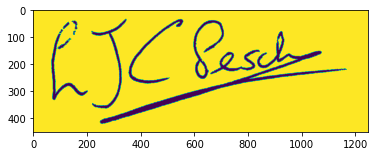

In [58]:
import matplotlib.pyplot as plt
img = plt.imread('/content/sample_Signature/sample_Signature/forged/NFI-00301001.png')
plt.imshow(img)

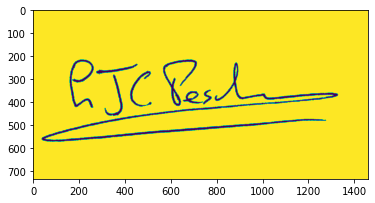

In [59]:
img1 = plt.imread('/content/sample_Signature/sample_Signature/genuine/NFI-00101001.png')
plt.imshow(img1)

In [60]:
import glob
gen = [glob.glob('/content/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('/content/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('/content/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('/content/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('/content/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('/content/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('/content/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('/content/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]

In [61]:
import glob
import keras
import cv2

#gen = glob.glob("/content/sample_Signature/sample_Signature/genuine/*.*")
#forg = glob.glob("/content/sample_Signature/sample_Signature/forged/*.*")
# ../input/handwritten-signatures/sample_Signature/sample_Signature/forged/NFI-00101014.png

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data  = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [62]:
train_data.shape

(540, 224, 224, 3)

In [63]:
test_data.shape

(180, 224, 224, 3)

In [64]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)

test_data,test_labels = shuffle(test_data,test_labels)

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D

network = Sequential()

network.add(Conv2D(64,(3,3),input_shape=(224,224,3),activation='relu'))
network.add(MaxPooling2D(3,3))
network.add(Conv2D(32,(3,3),activation='relu'))
network.add(MaxPooling2D(2,2))
#network.add(Flatten())

network.add(Dense(128,activation = 'relu'))
network.add(Flatten())
network.add(Dropout(rate=0.3))
network.add(Dense(2,activation = 'softmax'))
network.add(Flatten())

network.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
#model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
#model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 dense_4 (Dense)             (None, 36, 36, 128)       4224      
                                                                 
 flatten_4 (Flatten)         (None, 165888)           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [66]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]


EPOCHS = 5
BS = 1
progess = network.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/5
513/513 [==============================] - 5s 9ms/step - loss: 0.7039 - accuracy: 0.5010 - val_loss: 0.6932 - val_accuracy: 0.4815
Epoch 2/5
513/513 [==============================] - 4s 9ms/step - loss: 0.6932 - accuracy: 0.5049 - val_loss: 0.6931 - val_accuracy: 0.4074
Epoch 3/5
513/513 [==============================] - 4s 9ms/step - loss: 0.6931 - accuracy: 0.4854 - val_loss: 0.6931 - val_accuracy: 0.4444
Epoch 4/5
513/513 [==============================] - 4s 9ms/step - loss: 0.6931 - accuracy: 0.5224 - val_loss: 0.6931 - val_accuracy: 0.4444
Epoch 5/5
513/513 [==============================] - 4s 9ms/step - loss: 0.6931 - accuracy: 0.4990 - val_loss: 0.6931 - val_accuracy: 0.4074


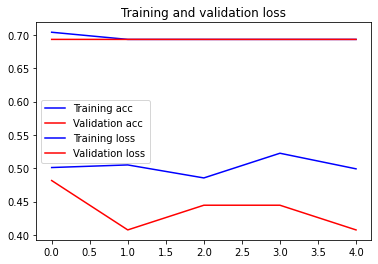

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [67]:
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()
 
plt.figure()

In [68]:
pred = network.predict(test_data)

In [69]:
pred  #prob of genuine, prob of forged

array([[0.5001798 , 0.49982017],
       [0.49996826, 0.50003177],
       [0.4996992 , 0.50030077],
       [0.5002929 , 0.4997071 ],
       [0.50003916, 0.49996084],
       [0.5004994 , 0.4995005 ],
       [0.50028044, 0.4997196 ],
       [0.5001069 , 0.49989307],
       [0.4999076 , 0.5000924 ],
       [0.5003018 , 0.49969822],
       [0.5000612 , 0.49993876],
       [0.50291216, 0.4970878 ],
       [0.5000656 , 0.4999344 ],
       [0.4996586 , 0.50034136],
       [0.50031024, 0.4996898 ],
       [0.5002832 , 0.49971688],
       [0.5005156 , 0.49948445],
       [0.5000551 , 0.49994496],
       [0.49980596, 0.500194  ],
       [0.49993613, 0.50006384],
       [0.50030553, 0.4996945 ],
       [0.5001206 , 0.49987936],
       [0.5001466 , 0.49985337],
       [0.5001437 , 0.49985632],
       [0.50036013, 0.4996398 ],
       [0.5003971 , 0.4996029 ],
       [0.5008262 , 0.4991738 ],
       [0.5001092 , 0.49989074],
       [0.4999801 , 0.5000199 ],
       [0.5004102 , 0.4995898 ],
       [0.

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(pred.argmax(axis=1), test_labels)

0.5166666666666667